## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

/bin/sh: nvidia-smi: command not found


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = (x - x.min()) / (x.max() - x.min())
    if flatten:
        x = x.reshape(len(x), -1)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[1024, 512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0725 14:57:45.628035 4535883200 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 14:57:45.640227 4535883200 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 14:57:45.642706 4535883200 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 32)                2080      
__________

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0725 14:57:45.755986 4535883200 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0725 14:57:45.763815 4535883200 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0725 14:57:45.855979 4535883200 deprecation.py:323] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0725 14:57:45.914001 4535883200 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 16s 320us/step - loss: 2.0012 - acc: 0.2619 - val_loss: 1.8338 - val_acc: 0.3411
Epoch 2/100
50000/50000 [==============================] - 16s 312us/step - loss: 1.7663 - acc: 0.3622 - val_loss: 1.6904 - val_acc: 0.3912
Epoch 3/100
50000/50000 [==============================] - 17s 333us/step - loss: 1.6697 - acc: 0.3992 - val_loss: 1.6042 - val_acc: 0.4227
Epoch 4/100
50000/50000 [==============================] - 15s 297us/step - loss: 1.5813 - acc: 0.4316 - val_loss: 1.5834 - val_acc: 0.4177
Epoch 5/100
50000/50000 [==============================] - 15s 301us/step - loss: 1.5247 - acc: 0.4521 - val_loss: 1.5218 - val_acc: 0.4506
Epoch 6/100
50000/50000 [==============================] - 15s 298us/step - loss: 1.4839 - acc: 0.4663 - val_loss: 1.5652 - val_acc: 0.4449
Epoch 7/100
50000/50000 [==============================] - 15s 302us/step - loss: 1.4532 - acc: 0.4792 - val_l

Epoch 59/100
50000/50000 [==============================] - 16s 328us/step - loss: 0.2873 - acc: 0.8978 - val_loss: 2.7582 - val_acc: 0.5066
Epoch 60/100
50000/50000 [==============================] - 16s 322us/step - loss: 0.2974 - acc: 0.8940 - val_loss: 2.8763 - val_acc: 0.5026
Epoch 61/100
50000/50000 [==============================] - 16s 320us/step - loss: 0.2842 - acc: 0.8989 - val_loss: 2.8931 - val_acc: 0.5029
Epoch 62/100
50000/50000 [==============================] - 19s 388us/step - loss: 0.3157 - acc: 0.8879 - val_loss: 2.8475 - val_acc: 0.5045
Epoch 63/100
50000/50000 [==============================] - 17s 345us/step - loss: 0.3198 - acc: 0.8866 - val_loss: 2.8613 - val_acc: 0.5090
Epoch 64/100
50000/50000 [==============================] - 18s 351us/step - loss: 0.2697 - acc: 0.9046 - val_loss: 2.8788 - val_acc: 0.5014
Epoch 65/100
50000/50000 [==============================] - 19s 373us/step - loss: 0.2613 - acc: 0.9072 - val_loss: 2.9820 - val_acc: 0.5072
Epoch 66/100


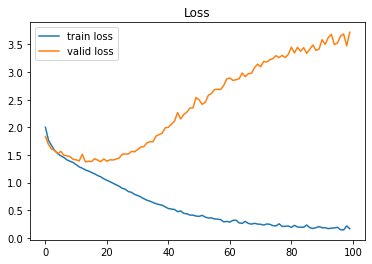

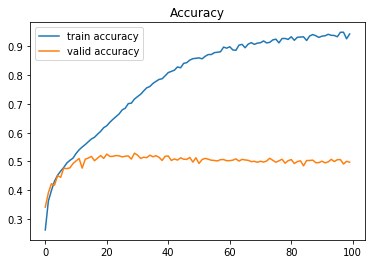

In [12]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()